### Problem Statement:

The pre-owned car market in India has witnessed significant growth, surpassing new car sales in recent years. Cars4U, a tech start-up, aims to capitalize on this trend. However, the pricing of used cars poses a challenge due to the inherent uncertainty in both pricing and supply. To succeed in the market, Cars4U requires a robust pricing model that accurately predicts the prices of used cars. This model will enable the business to devise profitable strategies through differential pricing. The aim is to determine the market price and avoid selling cars below it, ensuring sustainable growth for the company.

### Objective:

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business

### Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in dollars
- Price: The price of the used car in dollars

In [1]:
#Importing the libraries for data manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold


from sklearn. linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [3]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is D4F8-5A68

 Directory of C:\Users\SERWAH\Desktop\Ailead\Machine Learning\Assignment

05/08/2023  10:30 PM    <DIR>          .
05/08/2023  02:25 PM    <DIR>          ..
05/08/2023  01:40 PM    <DIR>          .ipynb_checkpoints
05/08/2023  11:05 AM    <DIR>          __pycache__
05/08/2023  01:39 PM           343,057 BACK PAIN- LOGISTIC REGRESSION.ipynb
10/21/2022  10:25 PM            41,844 backpain.csv
05/08/2023  10:14 PM           196,794 boxplots.png
05/08/2023  10:30 PM           869,953 Cars4U Project.ipynb
05/08/2023  02:00 PM             6,919 Cars4U_Project.ipynb
05/08/2023  10:14 PM            56,548 Heatmap showing correlation of features with target.png
09/27/2018  03:35 AM            55,628 insurance.csv
05/08/2023  01:40 PM           130,031 Machine learning canvas assignments.ipynb
05/08/2023  10:14 PM            50,285 outlier_plots.png
05/08/2023  10:14 PM            71,380 scatter_plots_features_vs_target.png
04/

In [4]:
# Read the dataset

car_4_u= pd.read_csv("used_cars_data-1.csv")
car_4_u

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


From reading the dataset we can see we have 7253 rows and 14 columns

### Explore the dataset

In [5]:
# check the first 5 rows and the columns of the data
car_4_u.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [6]:
# check for duplicate
car_4_u.duplicated().sum()

0

In [7]:
# Check the data type
car_4_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


The dataset contains 7253 entries and 14 columns. It shows the various data types associated with each column. There are three columns as integer datatype, three columns as float data type and eight columns as object data type.

In [8]:
# check for missing values
car_4_u.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

There are two (2) missing values under Mileage, forty- six (46) missing values under Engine, one hundred and seventy- five(175) missing values under Power, fifty- three(53) missing values under seats and One thousand two hundres and thirty- four (1234) missing values under Price.

In [9]:
# descriptive computational analysis for numerical variables

car_4_u.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


The datasets spans from the Year 1996 to 2019. The minimum for the prices of new and used cars are 3.9 and 0.44 respectively whereas the maximum are 375 and 160 respectively. Skemcars have no seat at all

In [10]:
# select only the features that are object data types and observe

cat_car_4_u = car_4_u.select_dtypes(include = "object")

cat_car_4_u.describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,7251,7207,7078
unique,2041,11,5,2,4,450,150,385
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,55,949,3852,5204,5952,207,732,280


The preferred fuel type and transmission are Diesel and Manual cars and preferred car is Mahindra XUV500 W8 2WD

In [11]:
for col in cat_car_4_u:
    print(car_4_u[col].value_counts())
    print("_"*40)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
________________________________________
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
________________________________________
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
________________________________________
Manual       5204
Autom

### Data Cleaning

As a Data Scientist i need to find out if i will use all the variables. If not there is no point trying to clean all the missing values. I can decide to select the variables i will need and clean the affected parts in the variables that i will use to build my model.

Price could be an important vaiable and missing values must be catered for.

Engine, Power and Seat wmay not add any contribution to the model hence i could choose not bother to clean those variables but for the purpose of this exercise i will clean all.

### Treating Price

In [12]:
car_4_u["Price"].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [13]:
car_4_u[(car_4_u["Price"] ==0.46)]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


I will replace the missing values with 0.46 so we know all data with price as 0.46 belongs to the missing values replaced

In [14]:
# fill missing rows in Price with 0.46

car_4_u["Price"].fillna(0.46, inplace = True)

### Treating Mileage

Mileage has only two missing values and i will drop it which i believe will not affect the data set

In [15]:
### Treating Power
car_4_u["Mileage"].describe()

count          7251
unique          450
top       17.0 kmpl
freq            207
Name: Mileage, dtype: object

In [16]:
# drop rows in Mileage

car_4_u.dropna(subset = ["Mileage"], inplace = True)
car_4_u.reset_index(drop = True, inplace = True)

In [17]:
### Treating Seat

car_4_u["Seats"].describe()

count    7198.000000
mean        5.279800
std         0.811759
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [18]:
car_4_u[(car_4_u["Seats"] ==1.0)]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


Seat has 53 missing values and i will replace with 1.0 we know all  with Seat as 1 belongs to the missing values replaced

In [19]:
# fill missing rows in Seats with 1.0

car_4_u["Seats"].fillna(1.0, inplace = True)

In [20]:
### Treating Engine

car_4_u["Engine"].describe()

count        7205
unique        149
top       1197 CC
freq          732
Name: Engine, dtype: object

In [21]:
### Treating Power
car_4_u["Power"].describe()


count       7076
unique       384
top       74 bhp
freq         280
Name: Power, dtype: object

I will replace the missing values in the Engine and Power with Unknown so we know the category that belongs in Unknown

In [22]:
# we decide to fill missing values with Unknown

car_4_u['Engine'] = car_4_u['Engine'].fillna('Unknown')
car_4_u['Power'] = car_4_u['Power'].fillna('Unknown')


In [23]:
car_4_u[(car_4_u["Power"] =="Unknown")]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,Unknown,5.0,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,Unknown,5.0,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,Unknown,5.0,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,Unknown,5.0,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,Unknown,5.0,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59 kmpl,1364 CC,Unknown,5.0,8.525,0.46
6900,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.3 kmpl,Unknown,Unknown,1.0,8.525,0.46
6945,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3 kmpl,1197 CC,Unknown,5.0,8.525,0.46
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.0 kmpl,1086 CC,Unknown,5.0,4.550,0.46


In [24]:
# Sanity check
car_4_u.info()

car_4_u. isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7251 non-null   int64  
 1   Name               7251 non-null   object 
 2   Location           7251 non-null   object 
 3   Year               7251 non-null   int64  
 4   Kilometers_Driven  7251 non-null   int64  
 5   Fuel_Type          7251 non-null   object 
 6   Transmission       7251 non-null   object 
 7   Owner_Type         7251 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7251 non-null   object 
 10  Power              7251 non-null   object 
 11  Seats              7251 non-null   float64
 12  New_Price          7251 non-null   float64
 13  Price              7251 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.2+ KB


S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

We no longer have missing values and every column is in its right data type

## Feature Engineering

### Selecting the top 5 
- Mileage 
- Engine  
- Power

In [25]:
# set threshold to 100 for Mileage
threshold = 100

# get the value count of mileage
val_cnt = car_4_u["Mileage"].value_counts()


# filter the Mileage to only those with at least 100 occurrence
Mileage_array = val_cnt[val_cnt.values >= threshold].index.tolist()
Mileage_array

['17.0 kmpl', '18.9 kmpl', '18.6 kmpl', '21.1 kmpl', '20.36 kmpl']

In [26]:
# set threshold to 140 for Power
threshold = 140

# get the value count of Power
val_cnt_1 = car_4_u["Power"].value_counts()


# filter the Power to only those with at least 140 occurrence
Power_array = val_cnt_1[val_cnt_1.values >= threshold].index.tolist()
Power_array

['74 bhp', 'Unknown', '98.6 bhp', '73.9 bhp', '140 bhp']

In [27]:
# set threshold to 280 for Engine
threshold = 280

# get the value count of Engine
val_cnt2 = car_4_u["Engine"].value_counts()


# filter the Engine to only those with at least 280 occurrence
Engine_array = val_cnt2[val_cnt2.values >= threshold].index.tolist()
Engine_array

['1197 CC', '1248 CC', '1498 CC', '998 CC', '1198 CC']

In [28]:
Mileage_val = []

for i in range(car_4_u.shape[0]):  # iterate over all rows in data
    txt = car_4_u.Mileage.values[i]  # getting the values in Mileage column
    flag = 0  # flag variable
    for item in Mileage_array:  # iterate over the list of Mileage considered
        if item in txt and flag == 0:  # checking if Mileage name is in the row
            Mileage_val.append(item) # append to empty list
            flag = 1
    if flag == 0:  # if the row values is different from the list of Mileage considered
        Mileage_val.append("Others")

In [29]:
Power_val = []

for i in range(car_4_u.shape[0]):  # iterate over all rows in data
    txt = car_4_u.Power.values[i]  # getting the values in Power column
    flag = 0  # flag variable
    for item in Power_array:  # iterate over the list of Power considered
        if item in txt and flag == 0:  # checking if Power name is in the row
            Power_val.append(item) # append to empty list
            flag = 1
    if flag == 0:  # if the row values is different from the list of Power considered
        Power_val.append("Others")

In [30]:
Engine_val = []

for i in range(car_4_u.shape[0]):  # iterate over all rows in data
    txt = car_4_u.Engine.values[i]  # getting the values in Engine column
    flag = 0  # flag variable
    for item in Engine_array:  # iterate over the list of Engine considered
        if item in txt and flag == 0:  # checking if Mileage name is in the row
            Engine_val.append(item) # append to empty list
            flag = 1
    if flag == 0:  # if the row values is different from the list of Engine considered
        Engine_val.append("Others")

Create new columns called New_Mileage, New_Engine and Power_New

In [31]:
# Feature engineering.
car_4_u["New_Mileage"] = Mileage_val

car_4_u["New_Engine"] = Engine_val

car_4_u["Power_New"] = Power_val

In [32]:
# Sanity check

car_4_u["New_Mileage"].value_counts()

Others        6488
17.0 kmpl      207
18.9 kmpl      201
18.6 kmpl      144
21.1 kmpl      106
20.36 kmpl     105
Name: New_Mileage, dtype: int64

In [33]:
car_4_u["Power_New"].value_counts()

Others      6304
74 bhp       312
Unknown      175
98.6 bhp     166
73.9 bhp     152
140 bhp      142
Name: Power_New, dtype: int64

In [34]:
car_4_u["New_Engine"].value_counts()

Others     4912
1197 CC     732
1248 CC     610
1498 CC     370
998 CC      346
1198 CC     281
Name: New_Engine, dtype: int64

#### Visualization of the Data

##### Univariate Analysis: Numerical Features

In [35]:
def histogram_boxplot(data, feature, figsize=(20, 10), kde=False, bins=None):
    """
    Plot a boxplot and a histogram of a feature in a given dataframe.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe.
    feature : str
        The name of the column to plot.
    figsize : tuple of float, optional
        The size of the figure. Default is (10, 5).
    kde : bool, optional
        Whether to show the density curve. Default is False.
    bins : int or sequence of scalars or str, optional
        Specification of histogram bins. Default is None.

    Returns:
    --------
    None
    """
    # create a 2x1 subplot with a shared x-axis
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # plot the boxplot on the top subplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box, showmeans=True, color="red"
    )

    # plot the histogram on the bottom subplot
    if bins:
        # if bins are specified, use them in the histogram plot
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins, palette="muted")
    else:
        # if bins are not specified, use the default number of bins in the histogram plot
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

    # add vertical lines at the mean and median values of the feature in the histogram plot
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="violet", linestyle="-")

    # show the plot
    plt.show()


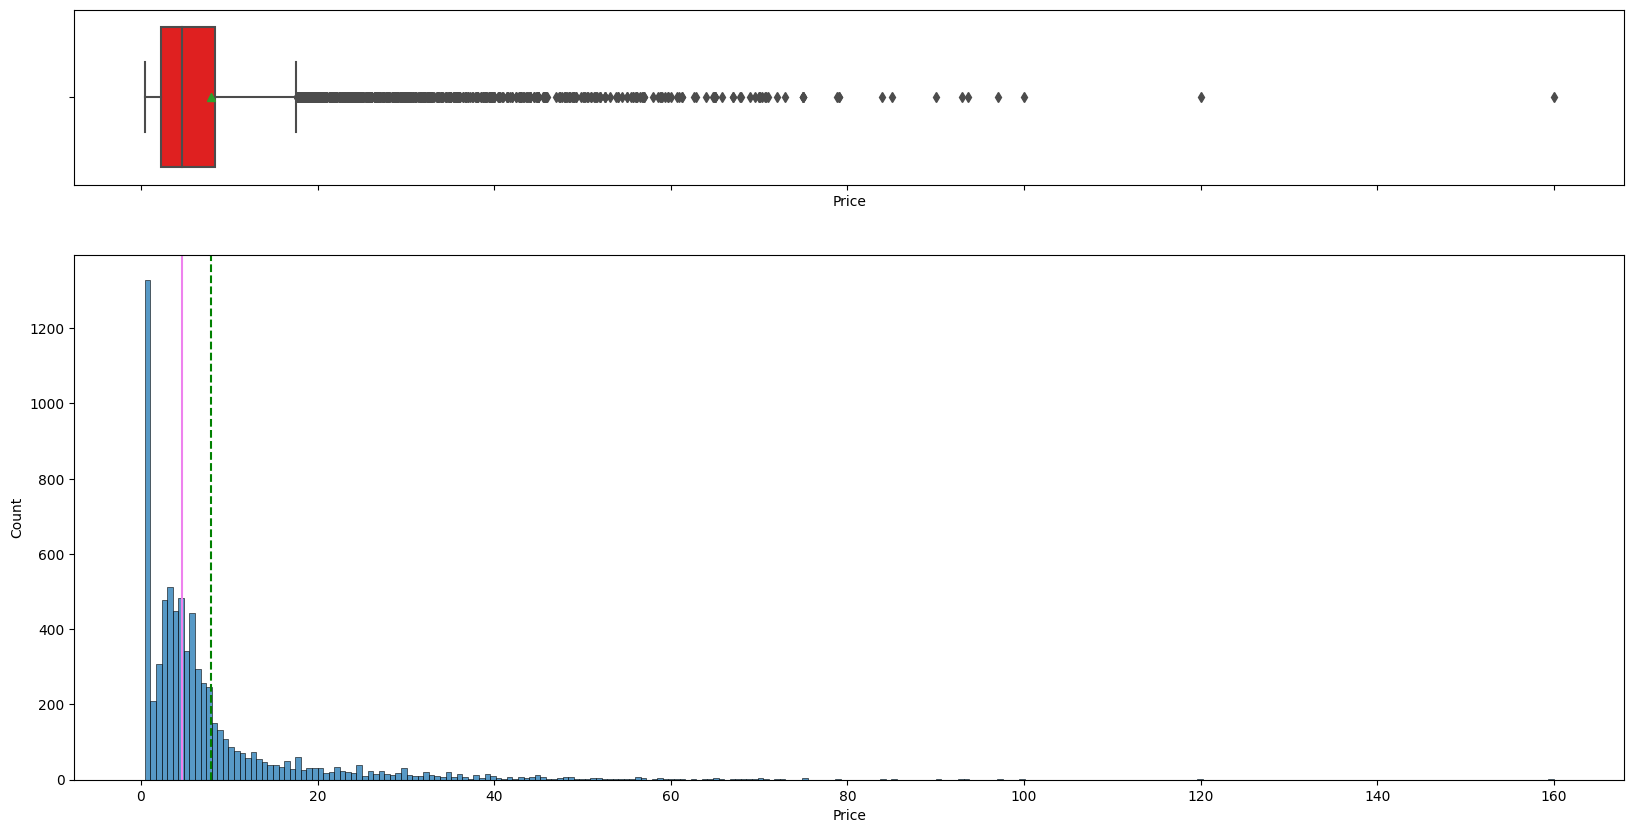

In [36]:
histogram_boxplot(data= car_4_u, feature = "Price")

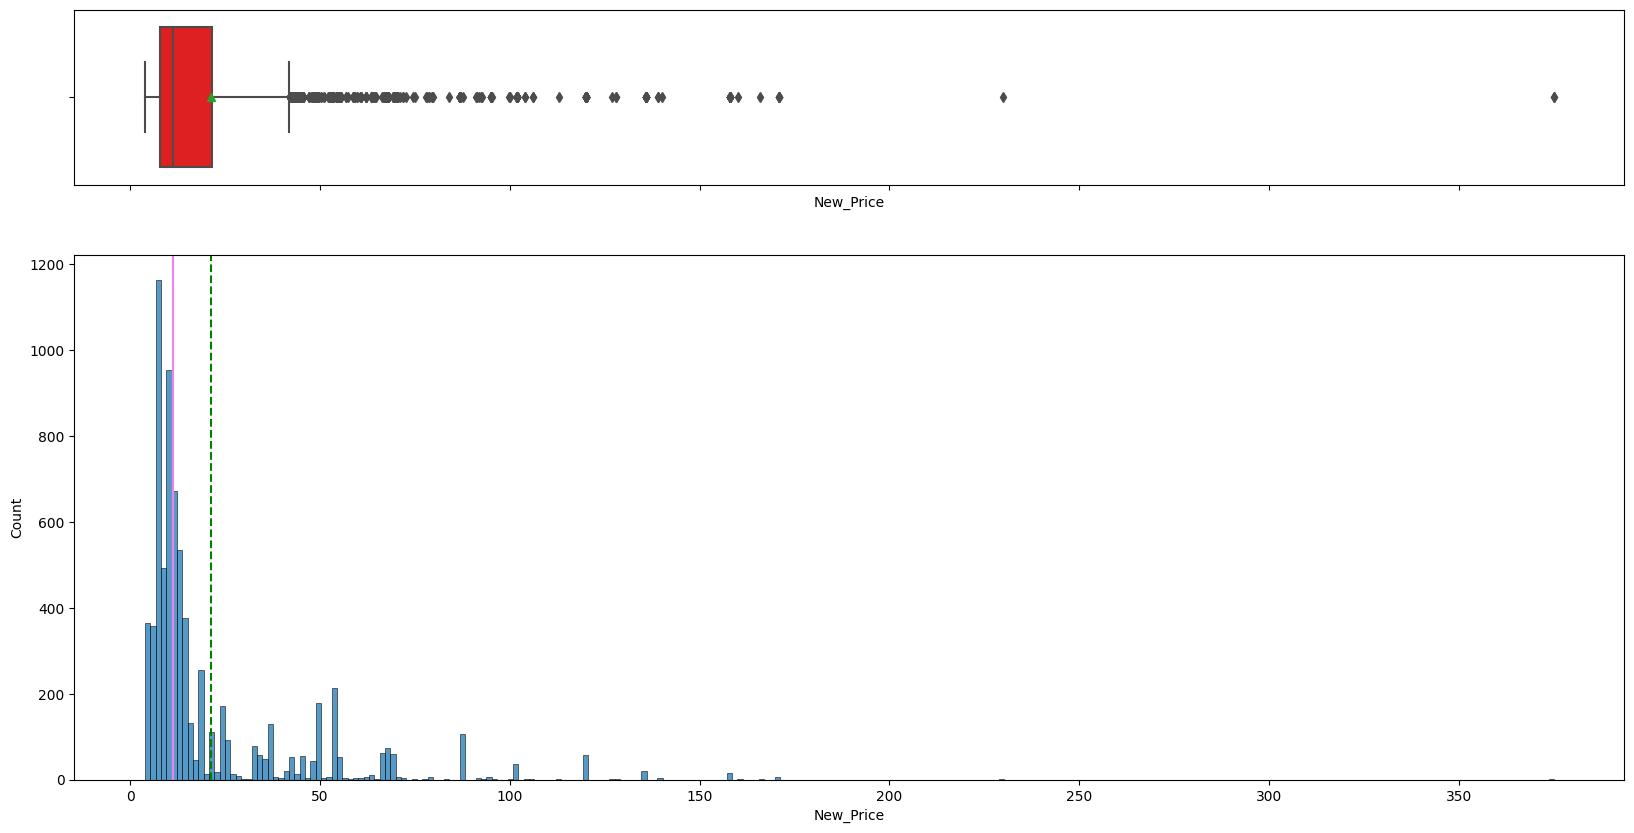

In [37]:
histogram_boxplot(data= car_4_u, feature = "New_Price")

These plots are rightly skewed as their means are higher than their medians and we see a number of outliers that need to be treated

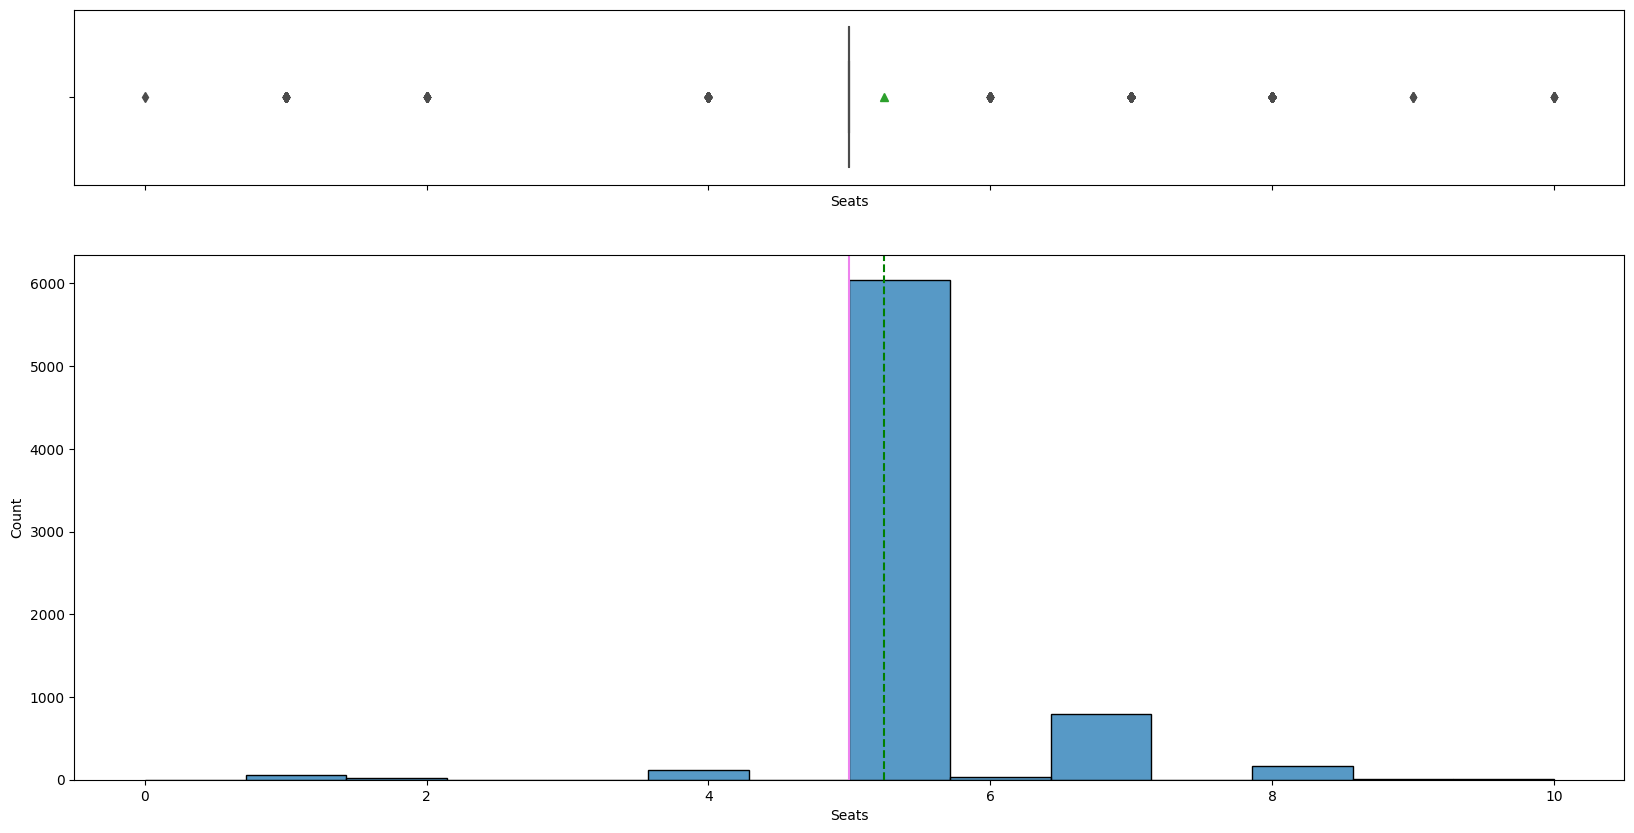

In [38]:
histogram_boxplot(data= car_4_u, feature = "Seats")

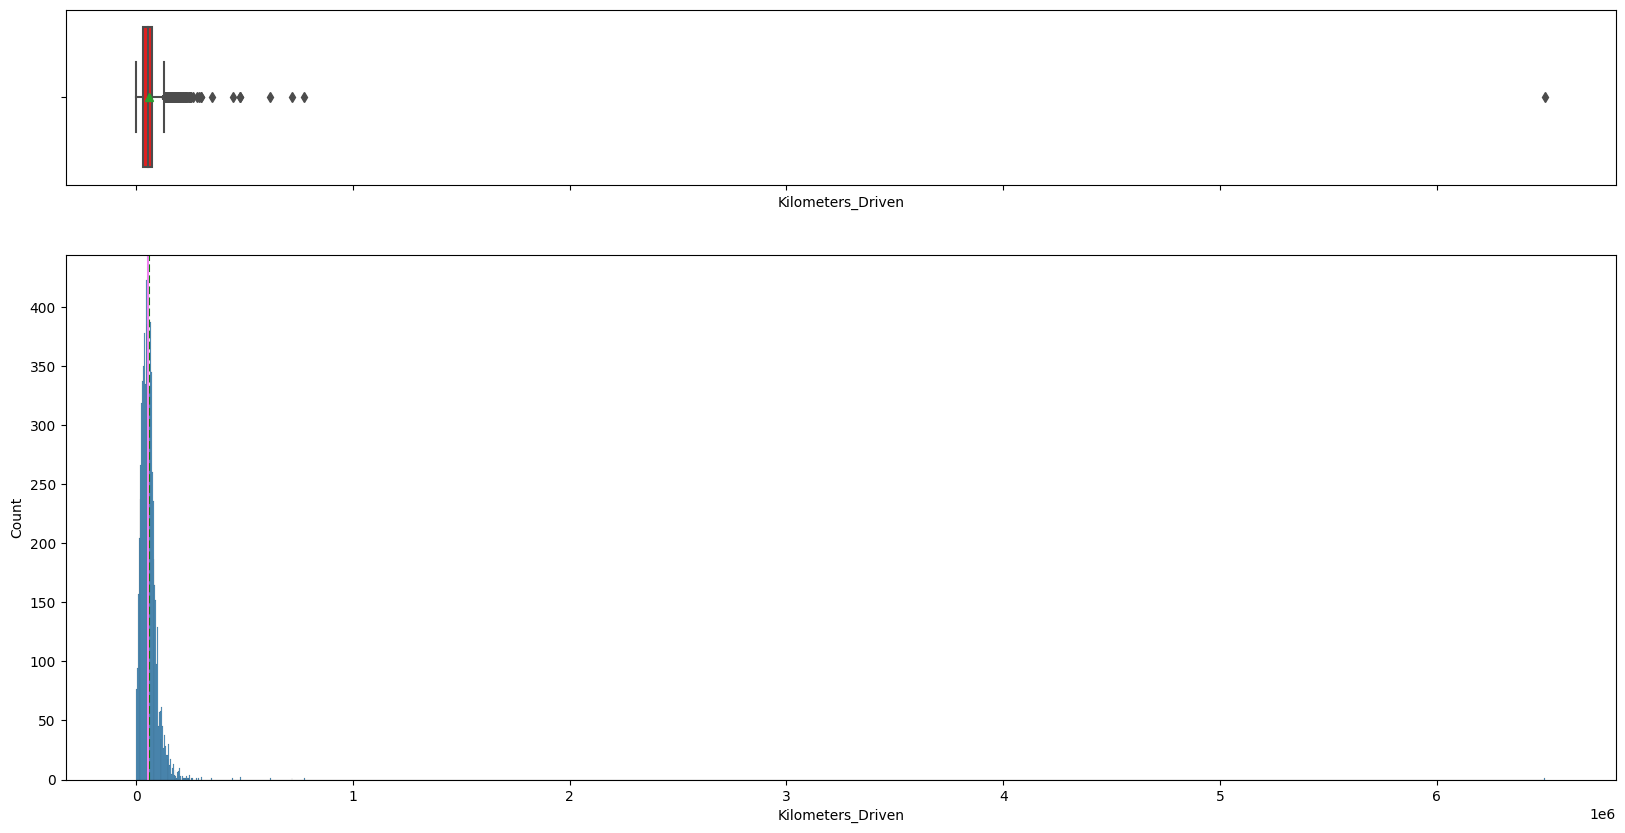

In [39]:
histogram_boxplot(data= car_4_u, feature = "Kilometers_Driven")

The mean and median are quite close in Kilometers Driven with outliers

##### Univariate Analysis: Categorical Features

In [40]:
# Function to create labeled barplots with optional percentage display

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Plot a labeled barplot of a categorical feature in a given dataframe.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input dataframe.
    feature : str
        The name of the column to plot.
    perc : bool, optional
        Whether to display percentages instead of count. Default is False.
    n : int, optional
        The number of top category levels to display. Default is None (display all levels).

    Returns:
    --------
    None
    """
    total = len(data[feature])  # get the length of the column
    count = data[feature].nunique()  # get the number of unique categories

    # Set the size of the plot based on the number of categories to be displayed
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation = 45, fontsize = 14)  # rotate x-tick labels and set font size
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),  # set the order of bars based on the counts
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # calculate percentage of each category
        else:
            label = p.get_height()  # get the count of each category

        x = p.get_x() + p.get_width() / 2  # calculate the x coordinate of the bar
        y = p.get_height()  # get the height of the bar

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # add the label to the top of each bar

    plt.show()  # show the plot


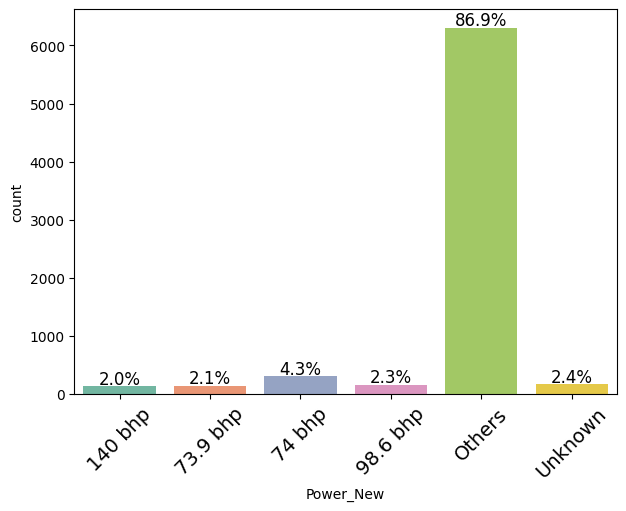

In [41]:
labeled_barplot(data = car_4_u, feature= "Power_New", perc = True)

Majority of the power in engine is in Others follwed by those cars with 74 bhp power in engine. The rest are about the same percentages

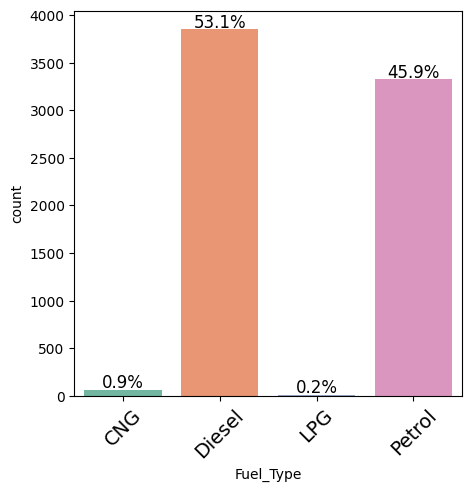

In [42]:
labeled_barplot(data = car_4_u, feature= "Fuel_Type", perc = True)

Majority of the cars run on Diesel with 53.1% followed by Petrol. LPG and CNG are under 1% 

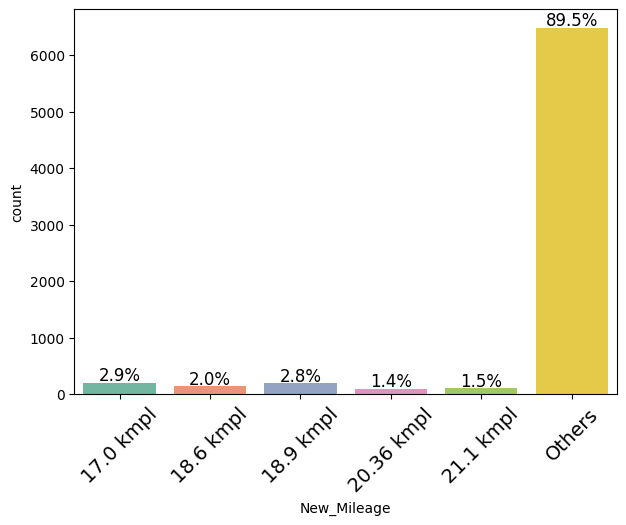

In [43]:
labeled_barplot(data = car_4_u, feature= "New_Mileage", perc = True)

Others is leading Mileage follwed by cars with 17.0 kmpl mileage then 18.9 kmpl

In [44]:
# Finding the correlation with the numerical variables

In [45]:
# Select numerical variables
car_num_data = car_4_u.select_dtypes(include = "number")

In [46]:
# check for correlation
mat_corr = car_num_data.corr()
mat_corr

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
S.No.,1.000000,0.005592,-0.007677,-0.007709,-0.020730,-0.219998
Year,0.005592,1.000000,-0.187881,0.045319,-0.006231,0.263657
Kilometers_Driven,-0.007677,-0.187881,1.000000,0.078187,0.015499,-0.010398
Seats,-0.007709,0.045319,0.078187,1.000000,0.030154,0.049937
New_Price,-0.020730,-0.006231,0.015499,0.030154,1.000000,0.667512
Price,-0.219998,0.263657,-0.010398,0.049937,0.667512,1.000000


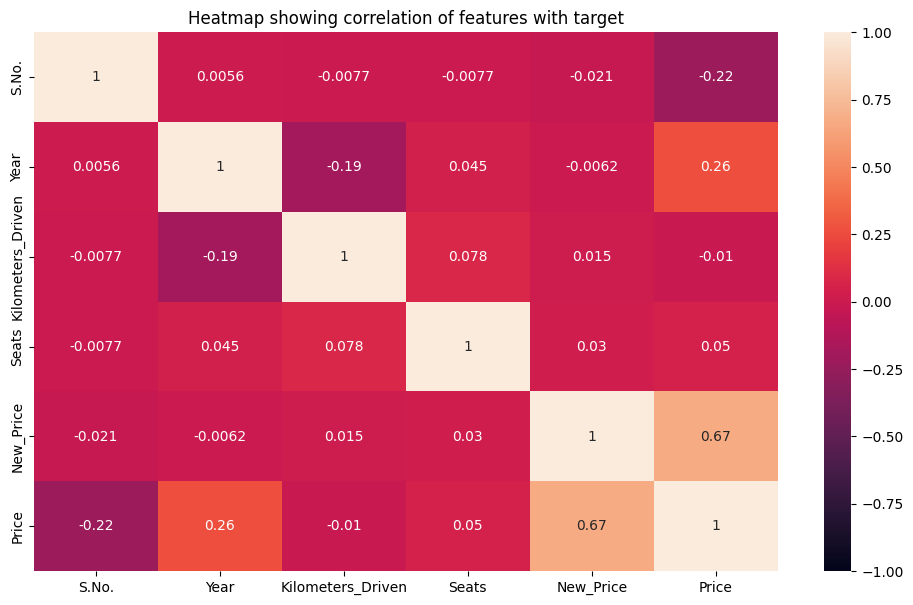

In [47]:
plt.figure(figsize = (12,7))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1)
plt.title("Heatmap showing correlation of features with target")

# save plot
plt.savefig("Heatmap showing correlation of features with target.png", bbox_inches='tight')

plt.show()

We notice multicollinearity between New_Price and Price which we do not want. The correlation between the targets(New_Price and Price) and the variables are not high. We see a not so strong correlation between Year and Price. Seial Number has no impact on the prices of used cars

### Confirming the Heatmap Correlation with scatterplots

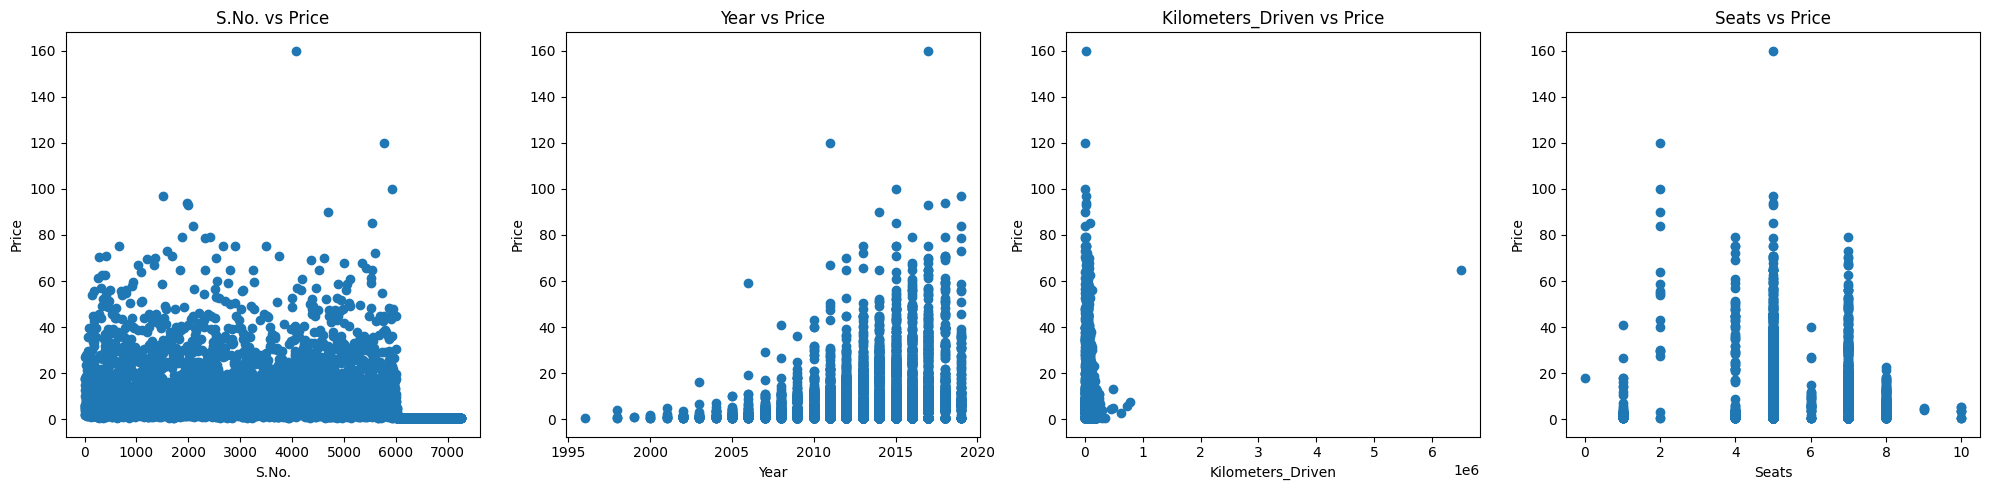

In [48]:
# Selecting the features
x_feat_1 = ["S.No.", "Year", "Kilometers_Driven", "Seats"]

# Selecting the target
y_feat_2 = ["Price"]

fig, axes = plt.subplots(nrows=1, ncols=len(x_feat_1), figsize=(20, 5))

for o, x_feat in enumerate(x_feat_1):
    axes[o].scatter(car_4_u[x_feat], car_4_u[y_feat_2[0]])
    axes[o].set_xlabel(x_feat)
    axes[o].set_ylabel(y_feat_2[0])
    axes[o].set_title(f'{x_feat} vs {y_feat_2[0]}')
    axes[o].grid(False)

plt.savefig("scatter_plots_features_vs_target.png")

plt.tight_layout()
plt.show()

There is no correlation between Serial Number and Price, Kilometers driven and Price and Seats and Price. We see some correlation though not strong between Year and Price. As the Year goes up we see a rise in Price of used cars

### Correlation with categorical features and Price (target)

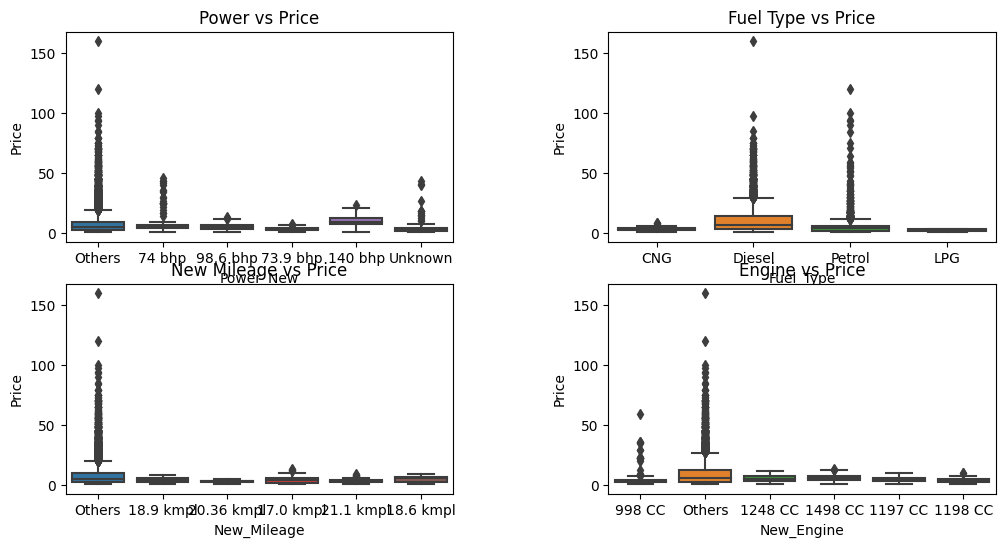

In [49]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Plot first boxplot
sns.boxplot(x="Power_New", y="Price", data=car_4_u, ax=axs[0, 0])
axs[0, 0].set_title("Power vs Price")

# Plot second boxplot
sns.boxplot(x="Fuel_Type", y="Price", data=car_4_u, ax=axs[0, 1])
axs[0, 1].set_title("Fuel Type vs Price")

# Plot third boxplot
sns.boxplot(x="New_Mileage", y="Price", data=car_4_u, ax=axs[1, 0])
axs[1, 0].set_title("New Mileage vs Price")

# Plot fourth boxplot
sns.boxplot(x="New_Engine", y="Price", data=car_4_u, ax=axs[1, 1])
axs[1, 1].set_title("Engine vs Price")

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.4)

# Save the plot
plt.savefig("boxplots.png", dpi=300)

# Display the plot
plt.show()


There seems to have price rise with Petrol cars compared with the others cars using other fuel types. Others seem to be high among these columns but we are unable to break that down. We notice high outliers as well

### Detecting Outliers and Treatment

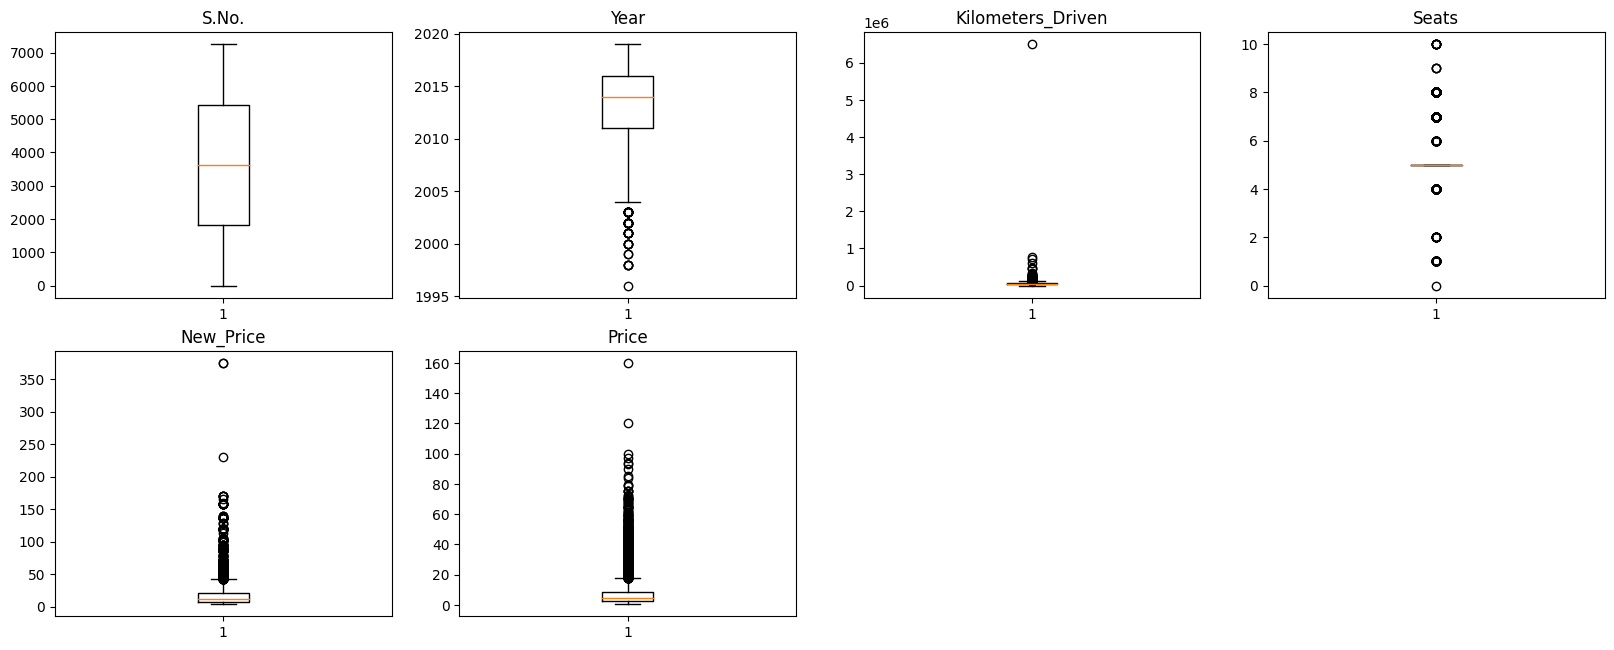

In [50]:
# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (car_num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(car_4_u[variable])
    plt.title(variable)

plt.savefig("outlier_plots.png")
plt.show()

We are able to visualize all the outliers in the numerical features. We will treat all the outliers minus the target which is Price. Serial Number does not have outliers

#### Treating Outliers

In [51]:
car_num_data.drop(["Price", "New_Price"], axis = 1, inplace = True)

car_num_data.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Seats'], dtype='object')

In [52]:
# Function to treat outliers in numerical variables using IQR method
def treat_outliers(car_4_u, col):
    """
    Treat outliers in numerical variables
    df: DataFrame
    col: str, name of the numerical variable
    """
    Q1 = car_4_u[col].quantile(0.25) # first quartile
    Q3 = car_4_u[col].quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lower_whisker = Q1 - (1.5 * IQR) # calculate lower whisker
    upper_whisker = Q3 + (1.5 * IQR) # calculate upper whisker
    car_4_u[col] = np.clip(car_4_u[col], lower_whisker, upper_whisker) # clip the values of the variable between the lower and upper whisker
    return car_4_u

I used clipping to treat the outlier, any outlier below the lower whisker or upper whiskers were clipped to the the lower and upper whiskers respectively

In [53]:
# Function to treat outliers in all numerical variables of a DataFrame
def treat_outliers_all(car_4_u, col_list):
    """
    Treat outliers in all numerical variables of a DataFrame
    df: DataFrame
    col_list: list of str, names of the numerical variables
    """
    for c in col_list:
        car_4_u = treat_outliers(car_4_u, c)
    return car_4_u

In [54]:
car_4_u = treat_outliers_all(car_4_u, car_num_data)

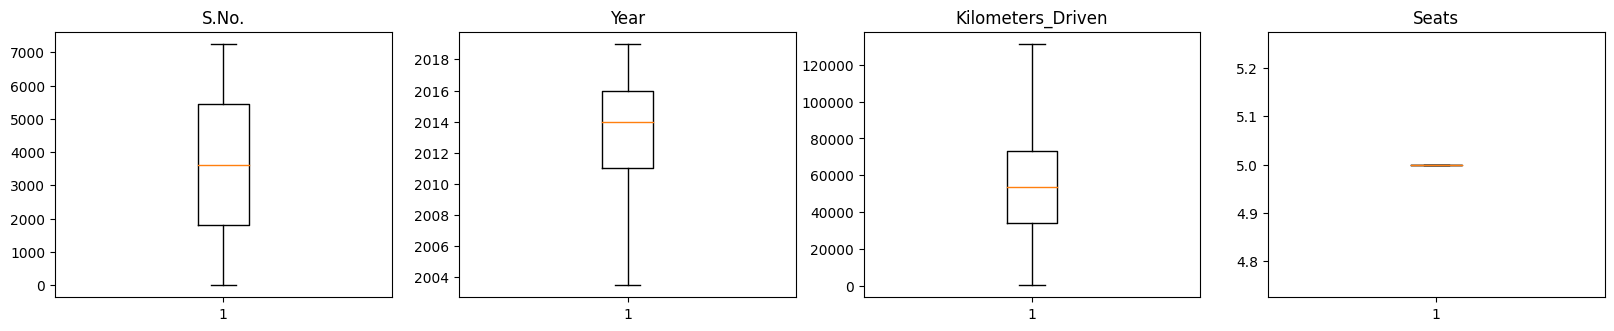

In [55]:
# outlier detection using boxplot
plt.figure(figsize = (20, 20))

for i, variable in enumerate (car_num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(car_4_u[variable])
    plt.title(variable)

plt.savefig("outlier_plots.png")
plt.show()

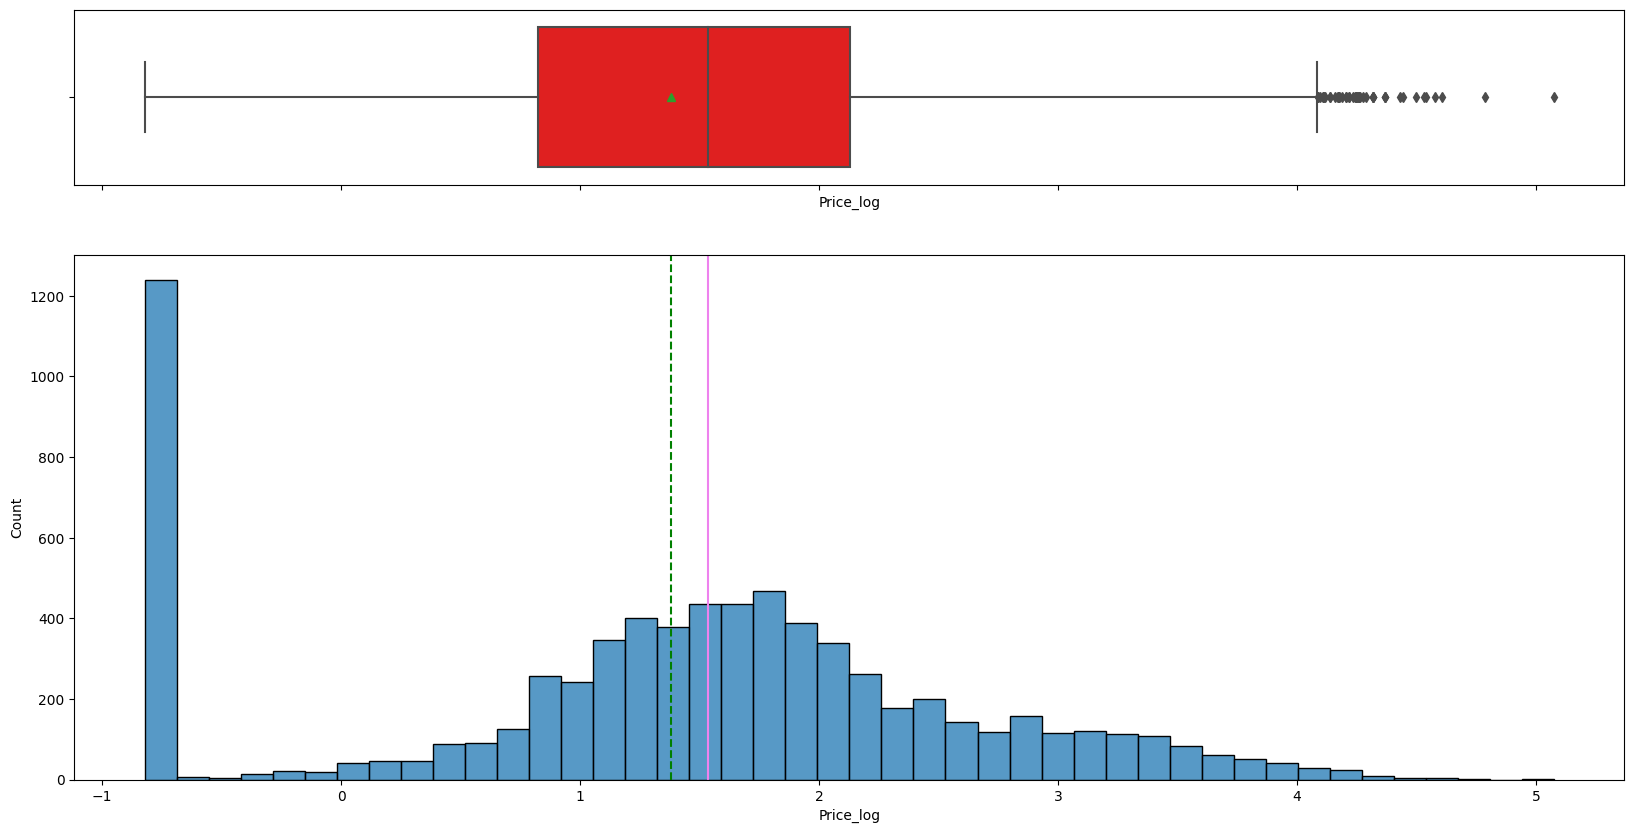

In [56]:
#transform the target using log transformation
car_4_u["Price_log"] = np.log(car_4_u["Price"]) +1e-6

histogram_boxplot(data= car_4_u, feature = "Price_log")

I want to log transform the Target to make the right skewed distribution appropriately normally distributed

###  Model Building

In [57]:
# We first need to select the features that we want to use
car_4_u.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'New_Mileage', 'New_Engine', 'Power_New',
       'Price_log'],
      dtype='object')

In [58]:
# Select features and target

x = car_4_u[["Kilometers_Driven", "Fuel_Type", "Transmission", "Owner_Type", "Seats", "New_Mileage", "New_Engine", 
                "Power_New", "S.No."]]

y = car_4_u["Price_log"] # +1e-10

In [59]:
# convert all categorical features to numerical data: OneHotEncoding

x =  pd.get_dummies(x, drop_first= True)

x.head()

,Kilometers_Driven,Seats,S.No.,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,New_Engine_1198 CC,New_Engine_1248 CC,New_Engine_1498 CC,New_Engine_998 CC,New_Engine_Others,Power_New_73.9 bhp,Power_New_74 bhp,Power_New_98.6 bhp,Power_New_Others,Power_New_Unknown
0,72000,5.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,41000,5.0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,46000,5.0,2,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,87000,5.0,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,40670,5.0,4,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
# Build Model

In [61]:
#Cross Validation 
linr_regn_cv = LinearRegression()

kfold = KFold(shuffle= True)

scores = cross_val_score(linr_regn_cv, x, y , cv= kfold, scoring = "r2")

In [62]:
scores

array([0.46022393, 0.47488419, 0.43938524, 0.4674077 , 0.47831474])

In [63]:
# average
np.mean(scores)

0.46404316109223565

The model did not perform well but we need to compare with other performance metrics to confirm if indeed model is not performing well 

### Split the data into training and testing

In [64]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size = 0.2, random_state = 0)

In [65]:
# Checking size

x_train.shape

(4640, 25)

In [66]:
x_test.shape

(1451, 25)

In [67]:
x_val.shape

(1160, 25)

In [68]:
# Normalize the data
scaler = StandardScaler()# mean of zero and standard deviation of 1

x_train_sd = scaler.fit_transform(x_train)  
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [69]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions) # compute R-squared
    n = predictors.shape[0] # get the number of observations
    k = predictors.shape[1] # get the number of predictors
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    A function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # calculate performance metrics
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of performance metrics
    car_4_u_perf= pd.DataFrame({"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adj. R-squared": adjr2, "MAPE": mape}, index=[0])

    return car_4_u_perf

In [70]:
# instantiate the model
linr_regn = LinearRegression()

# fit the model
linr_regn.fit(x_train_sd, y_train)

LinearRegression()

In [71]:
# instantiate the model
ridge_regn = Ridge(random_state=0)

# fit the model
ridge_regn.fit(x_train_sd, y_train)

Ridge(random_state=0)

In [72]:
alpha_values = np.linspace(0.2,10, num = 10)
for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha = alpha)
    ridge.fit(x_train_sd, y_train)
    ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
    print(ridge_train)
    print(alpha)

       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.919008  0.740394   0.466823        0.463934  200447.966508
0.2
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.919008  0.740386   0.466823        0.463934  200448.268443
1.288888888888889
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.919008  0.740378   0.466822        0.463933  200448.571804
2.377777777777778
       RMSE      MAE  R-squared  Adj. R-squared           MAPE
0  0.919009  0.74037   0.466822        0.463933  200448.876832
3.4666666666666672
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.919009  0.740362   0.466822        0.463933  200449.183751
4.555555555555556
      RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.91901  0.740355   0.466821        0.463932  200449.492804
5.644444444444445
      RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.91901  0.740348    0.46682        0.463931  200449.804256
6.7333333333333

In [73]:
# instantiate the model
lasso_regn = Lasso(random_state=0)

#fit the model
lasso_regn.fit(x_train_sd, y_train)

Lasso(random_state=0)

In [74]:
alpha_values = np.linspace(0.001,0.2,  num = 10)

for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha = alpha)
    lasso.fit(x_train_sd, y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
    print(lasso_train)
    print(alpha)

      RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.91906  0.740589   0.466763        0.463874  200420.077858
0.001
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.923852  0.747671   0.461188        0.458269  203845.631706
0.023111111111111114
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.931456  0.756183   0.452281        0.449313  214845.202504
0.045222222222222226
     RMSE      MAE  R-squared  Adj. R-squared           MAPE
0  0.9401  0.76439   0.442069        0.439046  232183.393551
0.06733333333333334
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.949168  0.772591   0.431253        0.428171  244591.694606
0.08944444444444445
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.958503  0.780739    0.42001        0.416868  255578.060793
0.11155555555555556
       RMSE       MAE  R-squared  Adj. R-squared           MAPE
0  0.969771  0.790235   0.406294        0.403077  266564.511795
0.13

### Interprete Model Performance and Coefficients

In [75]:
# check performance of linear regression on train data
linr_regn_train = model_performance_regression(linr_regn, x_train_sd, y_train)
linr_regn_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.919008,0.740396,0.466823,0.463934,200447.911186


In [76]:
# check performance of linear regression on validation data
linr_regn_val = model_performance_regression(linr_regn, x_val_sd, y_val)
linr_regn_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.899724,0.72776,0.507685,0.496831,10871.142275


The model's performance appears to be relatively better on the validation data compared to the training data

In [77]:
# check performance of ridge regression on train data
ridge_regn_train = model_performance_regression(ridge_regn, x_train_sd, y_train)
ridge_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.919013,0.740329,0.466817,0.463928,200450.75407


In [78]:
# check performance of ridge regression on validation data
ridge_regn_val = model_performance_regression(ridge_regn, x_val_sd, y_val)
ridge_regn_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.899729,0.727761,0.507679,0.496825,10820.530622


The model's performance appears to be relatively better on the validation data compared to the training data. Ridge did not improve the linear regression

In [79]:
# check performance of lasso regression on train data
lasso = Lasso(random_state=0, alpha = 0.001)
lasso.fit(x_train_sd, y_train)
lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
lasso_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.91906,0.740589,0.466763,0.463874,200420.077858


In [80]:
# check performance of lasso regression on validation data
lasso_regn_val = model_performance_regression(lasso, x_val_sd, y_val)
lasso_regn_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.89966,0.727766,0.507754,0.496902,10106.534477


The model's performance appears to be relatively better on the validation data compared to the training data. Lasso also did not improve the linear regression

In [81]:
print(linr_regn.coef_)

print(x_train.columns)

[-1.69036279e-01 -1.07552856e-16 -6.38517775e-01  2.58536073e-01
 -1.18059469e-02 -6.73793065e-02 -3.52865582e-01 -1.09026082e-02
 -6.02924994e-02 -7.10884924e-02  1.55241250e-02 -1.48714897e-02
 -1.94695517e-02 -1.48344235e-02 -3.05491032e-03 -3.28289931e-03
 -8.58019078e-02 -5.83723629e-02 -4.87640005e-02 -3.04020152e-02
 -7.22571882e-02 -5.28965938e-02 -4.89984245e-02 -8.41337861e-02
 -1.06953482e-01]
Index(['Kilometers_Driven', 'Seats', 'S.No.', 'Fuel_Type_Diesel',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'New_Mileage_18.6 kmpl', 'New_Mileage_18.9 kmpl',
       'New_Mileage_20.36 kmpl', 'New_Mileage_21.1 kmpl', 'New_Mileage_Others',
       'New_Engine_1198 CC', 'New_Engine_1248 CC', 'New_Engine_1498 CC',
       'New_Engine_998 CC', 'New_Engine_Others', 'Power_New_73.9 bhp',
       'Power_New_74 bhp', 'Power_New_98.6 bhp', 'Power_New_Others',
       'Power_New_Unknown'],
   

In [82]:
# observe the coefficients of the linear regression

for i , col in enumerate(x_train.columns):
        print(f"{col} has coefficient of {np.exp(linr_regn.coef_[i])}")

Kilometers_Driven has coefficient of 0.844478266091535
Seats has coefficient of 0.9999999999999999
S.No. has coefficient of 0.5280745694730558
Fuel_Type_Diesel has coefficient of 1.2950328647620624
Fuel_Type_LPG has coefficient of 0.9882634698078773
Fuel_Type_Petrol has coefficient of 0.9348405430128558
Transmission_Manual has coefficient of 0.7026716389572636
Owner_Type_Fourth & Above has coefficient of 0.9891566097848725
Owner_Type_Second has coefficient of 0.9414891083007103
Owner_Type_Third has coefficient of 0.931379468434828
New_Mileage_18.6 kmpl has coefficient of 1.0156452502451983
New_Mileage_18.9 kmpl has coefficient of 0.9852385447921235
New_Mileage_20.36 kmpl has coefficient of 0.9807187559273121
New_Mileage_21.1 kmpl has coefficient of 0.9852750644765808
New_Mileage_Others has coefficient of 0.9969497511702767
New_Engine_1198 CC has coefficient of 0.9967224835162343
New_Engine_1248 CC has coefficient of 0.9177760175002037
New_Engine_1498 CC has coefficient of 0.94329863263

In [83]:
### Feature Selection

##### Foward Selection

In [84]:
# instantiate the model
reg = LinearRegression()

# build the forward feature selection
sfs = SFS(reg, k_features = x_train.shape[1], forward = True, verbose = 2, scoring = "r2", n_jobs = -1)

# fit the model
sfs = sfs.fit(x_train_sd, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    4.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.1s finished

[2023-05-08 22:31:50] Features: 1/25 -- score: 0.26118812648352036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2023-05-08 22:31:50] Features: 2/25 -- score: 0.3877558008292836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2023-05-08 22:31:51] Features: 3/25 -- score: 0.4283615434258781[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  2

### Visualise the model performance with the addition of each feature

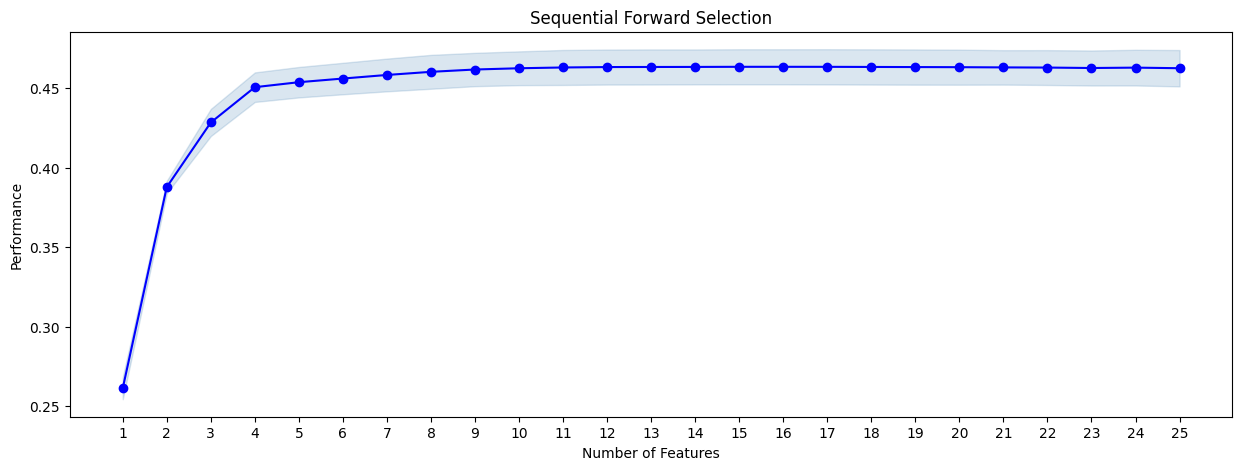

In [85]:
# Plotting the performance of the features
fig1= plot_sfs(sfs.get_metric_dict(), kind = "std_err", figsize = (15,5))
plt.title("Sequential Forward Selection")

plt.show()

### Rebuild the model with selected features

In [86]:
# build the forward feature selection
# selecting best performing features
sfs = SFS(reg, k_features= 6, forward= True, verbose= 2, scoring= "r2",n_jobs = -1)

sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished

[2023-05-08 22:31:53] Features: 1/6 -- score: 0.26118812648352036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished

[2023-05-08 22:31:54] Features: 2/6 -- score: 0.3877558008292836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2023-05-08 22:31:54] Features: 3/6 -- score: 0.4283615434258781[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 |

Kilometers Driven contributes positively to the price of used cars as it gives us 26% contribution as the first feature

In [87]:
# important features
feat_cols = list(sfs.k_feature_idx_)

x_train2 =x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]
x_val2 = x_val[x_val.columns[feat_cols]]

In [88]:
# renormalizing the original data
x_train2_sd = scaler.fit_transform(x_train2)
x_val2_sd = scaler.transform(x_val2)
x_test2_sd = scaler.transform(x_test2)

In [89]:
# re-build the linear regression

lin_reg2 = LinearRegression()

lin_reg2.fit(x_train2_sd, y_train)

LinearRegression()

In [90]:
reg2_train = model_performance_regression(lin_reg2, x_train2_sd, y_train)
reg2_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.927405,0.749672,0.457035,0.456332,213934.512043


In [91]:
reg2_val = model_performance_regression(lin_reg2, x_val2_sd, y_val)
reg2_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.904831,0.734031,0.502079,0.499488,38602.575731


Performance did not improve using the 6 features as compared with the previous R- Squared

To be sure the model does not overfit we now pass in the test data

In [92]:
reg2_test = model_performance_regression(lin_reg2, x_test2_sd, y_test)
reg2_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.948645,0.773408,0.424104,0.421711,188175.966269


The model's performance was no better. The test set did not do better based on the R-squared and Adjusted R squared. 

The model did not underfit. Based on these metrics, the model's performance appears to be relatively better on the validation data compared to the training data and testing data

The observations based on these metrics are as follows:

Training Set: The model shows moderate performance on the training set, with reasonably low values for RMSE and MAE. The R-squared and Adj. R-squared values indicate that the model explains around 45.7% of the variance in the prices. However, the MAPE value is quite high, suggesting a relatively high percentage of errors in predicting the prices. This could indicate potential issues with the model's accuracy and precision.

Validation Set: The model performs slightly better on the validation set compared to the training set. The lower RMSE and MAE values indicate improved accuracy in predicting the prices. The higher R-squared and Adj. R-squared values suggest that the model explains around 50.2% of the variance in the prices. The lower MAPE value indicates a reduced percentage of errors, indicating better performance compared to the training set.

Testing Set: The model's performance on the testing set is weaker compared to both the training and validation sets. The higher RMSE and MAE values indicate higher prediction errors and less accurate price predictions. The lower R-squared and Adj. R-squared values suggest that the model explains only around 42.4% of the variance in the prices. The higher MAPE value indicates a relatively high percentage of errors in predicting the prices accurately.

Based on these observations, it appears that the model might be overfitting the training data, leading to poorer performance on unseen data. 

### Conclusion

Moderate Performance: The model shows moderate performance on the training set, with reasonably low values for RMSE and MAE. This indicates that the model is able to capture some patterns and trends in the data.

Overfitting: However, the model's performance on the testing set is relatively poor compared to the training and validation sets. This suggests that the model may be overfitting the training data, as it fails to generalize well to unseen data. This could be due to the model capturing noise or specific patterns in the training set that do not hold true for new instances.

Prediction Accuracy: The R-squared and Adj. R-squared values indicate the proportion of the variance in the target variable (used car prices) that is explained by the model. These values are relatively low, suggesting that the model does not fully capture the variability in the prices. Additionally, the MAPE value is high, indicating a relatively high percentage of errors in predicting the prices accurately

It is important to consider other factors beyond the model's predictions when setting prices, such as market demand, inventory levels, and competitive pricing.

The business may need to collect additional data and consider other modeling techniques beyond linear regression to improve the accuracy of the pricing model.

Differential pricing strategies can be developed based on the predicted prices of used cars. For example, the business can charge higher prices for cars that are in high demand or have desirable features, while offering discounts on cars that are less popular or have less desirable features.

Continuous monitoring and updating of the pricing model will be necessary to ensure that it remains accurate and effective in the constantly evolving used car market.